# __Brough Lecture Notes: GARCH Models in R__

<br>

Finance 5330: Financial Econometrics <br>
Tyler J. Brough <br>
Last Updated: April 1, 2019 <br>
<br>
<br>

In [66]:
options(warn=-1)

In [67]:
require(bayesGARCH)
require(rugarch)
require(fGarch)
require(zoo)

In [41]:
ibm <- read.csv("./data/IBM-1999-2003.csv", header=T)

In [42]:
head(ibm)

PERMNO,date,TICKER,COMNAM,PERMCO,PRC,RET,CFACPR,RETX,sprtrn
12490,19990104,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,183.0000,-0.007458,2,-0.007458,-0.000919
12490,19990105,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,189.6250,0.036202,2,0.036202,0.013582
12490,19990106,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,188.7500,-0.004614,2,-0.004614,0.022140
12490,19990107,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,190.1875,0.007616,2,0.007616,-0.002051
12490,19990108,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,187.5625,-0.013802,2,-0.013802,0.004221
12490,19990111,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,189.2500,0.008997,2,0.008997,-0.008792


In [43]:
tail(ibm)

,PERMNO,date,TICKER,COMNAM,PERMCO,PRC,RET,CFACPR,RETX,sprtrn
1251,12490,20031223,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,92.79,-0.006425,1,-0.006425,0.002818
1252,12490,20031224,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,92.27,-0.005604,1,-0.005604,-0.001807
1253,12490,20031226,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,92.90,0.006828,1,0.006828,0.001691
1254,12490,20031229,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,93.52,0.006674,1,0.006674,0.012401
1255,12490,20031230,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,92.63,-0.009517,1,-0.009517,0.000144
1256,12490,20031231,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,92.68,0.000540,1,0.000540,0.002055


In [44]:
index <- as.Date(as.character(ibm$date), "%Y%m%d")
ret <- zoo(ibm$RET, as.Date(as.character(ibm$date), "%Y%m%d"))

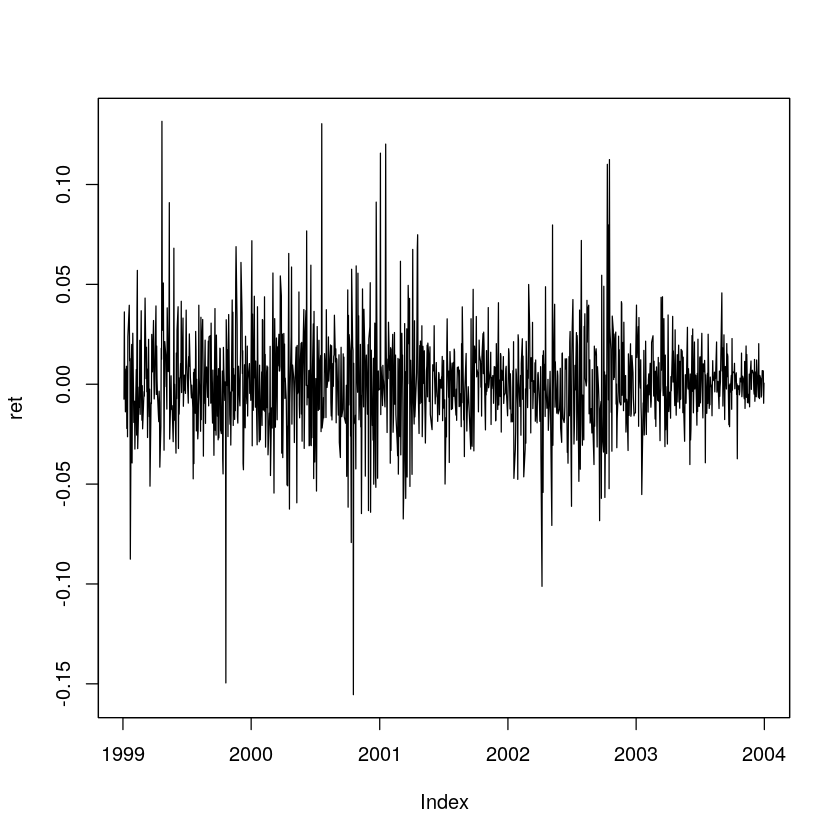

In [45]:
plot(ret)

In [46]:
help(ugarchspec)

ugarchspec-methods {rugarch},R Documentation
variance.model,"List containing the variance model specification: model Valid models (currently implemented) are “sGARCH”, “fGARCH”, “eGARCH”, “gjrGARCH”, “apARCH” and “iGARCH” and “csGARCH”. garchOrder The ARCH (q) and GARCH (p) orders. submodel If the model is “fGARCH”, valid submodels are “GARCH”, “TGARCH”, “AVGARCH”, “NGARCH”, “NAGARCH”, “APARCH”,“GJRGARCH” and “ALLGARCH”. external.regressors A matrix object containing the external regressors to include in the variance equation with as many rows as will be included in the data (which is passed in the fit function). variance.targeting (Logical or Numeric) If logical, indicates whether to use variance targeting for the conditional variance intercept “omega”, else if numeric, the value provided is used instead of the unconditional variance for the calculation of the intercept (in combination with the persistence value). Care should be taken if using the numeric option for apARCH and fGARCH models since the intercept is not the variance but sigma raised to the power of some positive value. Finally, if scaling is used (from the fit.control option in ugarchfit), the value provided is adjusted accordingly by the routine."
mean.model,List containing the mean model specification: armaOrder The autoregressive (ar) and moving average (ma) orders (if any). include.mean Whether to include the mean. archm Whether to include ARCH volatility in the mean regression. archpow Indicates whether to use st.deviation (1) or variance (2) in the ARCH in mean regression. arfima Whether to fractional differencing in the ARMA regression. external.regressors A matrix object containing the external regressors to include in the mean equation with as many rows as will be included in the data (which is passed in the fit function). archex (integer) Whether to multiply the last 'archex' external regressors by the conditional standard deviation.
distribution.model,"The conditional density to use for the innovations. Valid choices are “norm” for the normal distibution, “snorm” for the skew-normal distribution, “std” for the student-t, “sstd” for the skew-student, “ged” for the generalized error distribution, “sged” for the skew-generalized error distribution, “nig” for the normal inverse gaussian distribution, “ghyp” for the Generalized Hyperbolic, and “jsu” for Johnson's SU distribution. Note that some of the distributions are taken from the fBasics package and implenented locally here for convenience. The “jsu” distribution is the reparametrized version from the “gamlss” package."
start.pars,List of staring parameters for the optimization routine. These are not usually required unless the optimization has problems converging.
fixed.pars,List of parameters which are to be kept fixed during the optimization. It is possible that you designate all parameters as fixed so as to quickly recover just the results of some previous work or published work. The optional argument “fixed.se” in the ugarchfit function indicates whether to calculate standard errors for those parameters fixed during the post optimization stage.
...,.


In [47]:
spec <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean=FALSE))

In [48]:
# help(ugarchfit)

In [49]:
data <- zoo
fit <- ugarchfit(data = ret, spec = spec, solver="hybrid")

In [50]:
fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
omega   0.000001    0.000002   0.56769  0.57025
alpha1  0.042130    0.008328   5.05891  0.00000
beta1   0.956870    0.008117 117.88426  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000001    0.000011  0.12407  0.90126
alpha1  0.042130    0.026578  1.58515  0.11293
beta1   0.956870    0.027183 35.20093  0.00000

LogLikelihood : 2917.855 

Information Criteria
------------------------------------
                    
Akaike       -4.6415
Bayes        -4.6292
Shibata      -4.6415
Hannan-Quinn -4.6369

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
       

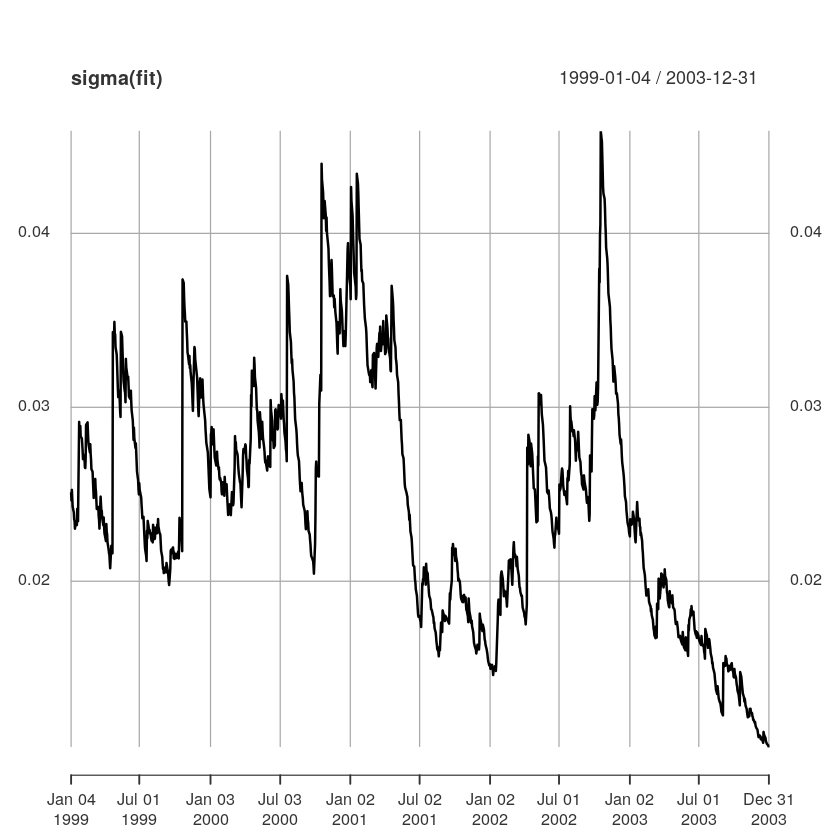

In [51]:
plot(sigma(fit))

### Compare with McDonald Chapter 24

![](./images/McDonald-IBM-GARCH.png)

In [52]:
vals <- coef(fit)
w.hat <- coef(fit)[1]
a.hat <- coef(fit)[2]
b.hat <- coef(fit)[3]

In [53]:
w.hat

omega 
1.397839e-06

In [54]:
a.hat

alpha1 
0.04213009

In [55]:
b.hat

beta1 
0.9568699

In [56]:
ret[76]

1999-04-22 
  0.131636 

In [57]:
ind <- (abs(ret) >= 0.12)
ret[ind]

1999-04-22 1999-10-21 2000-07-20 2000-10-18 2001-01-18 
  0.131636  -0.149533   0.130435  -0.155420   0.120233 

In [58]:
 ii <- 1:length(ret)

In [59]:
c(ii[ind])

[1]  76 203 391 454 516

In [68]:
spec2 <- ugarchspec(variance.model=list(model = "gjrGARCH", garchOrder=c(1,1,1)), mean.model=list(armaOrder=c(0,0), include.mean=F))

In [69]:
fit2 <- ugarchfit(data=ret, spec=spec2, solver="hybrid")

In [70]:
fit2


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000003    0.000003  0.79813 0.424794
alpha1  0.003790    0.005563  0.68119 0.495748
beta1   0.952995    0.010954 86.99676 0.000000
gamma1  0.084431    0.016816  5.02102 0.000001

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000003    0.000014  0.18586  0.85256
alpha1  0.003790    0.012459  0.30416  0.76101
beta1   0.952995    0.039385 24.19662  0.00000
gamma1  0.084431    0.051710  1.63279  0.10251

LogLikelihood : 2944.735 

Information Criteria
------------------------------------
                    
Akaike       -4.6827
Bayes        -4.6663
Shibata      -4.6827
Hannan-Quinn -4.6766

We

In [72]:
#data(dem2gbp)

In [73]:
y <- dem2gbp$DEM2GBP[1:750]

In [74]:
spec1 <- ugarchspec(mean.model=list(armaOrder=c(0,0), include.mean=F), distribution="norm")

In [75]:
fit1 <- ugarchfit(data=y, spec=spec1)

In [76]:
coef(fit1)

omega     alpha1      beta1 
0.04724239 0.22080564 0.63757006

In [78]:
spec2 <- ugarchspec(mean.model=list(armaOrder=c(0,0), include.mean=F), distribution="std")

In [79]:
fit2 <- ugarchfit(data=y, spec=spec2)

In [80]:
coef(fit2)

omega     alpha1      beta1      shape 
0.03422313 0.23884998 0.68493870 5.32761287

## Bayesian GARCH Modelings

In [77]:
help(bayesGARCH)

bayesGARCH {bayesGARCH},R Documentation
y,vector of observations of size T. NA values are not allowed.
mu.alpha,hyper-parameter mu_alpha (prior mean) for the truncated Normal prior on parameter alpha:=(alpha0 alpha1)'. Default: a 2x1 vector of zeros.
Sigma.alpha,"hyper-parameter Sigma_alpha (prior covariance matrix) for the truncated Normal prior on parameter alpha. Default: a 2x2 diagonal matrix whose variances are set to 1'000, i.e., a diffuse prior. Note that the matrix must be symmetric positive definite."
mu.beta,hyper-parameter mu_beta (prior mean) for the truncated Normal prior on parameter beta. Default: zero.
Sigma.beta,"hyper-parameter Sigma_beta>0 (prior variance) for the truncated Normal prior on parameter beta. Default: 1'000, i.e., a diffuse prior."
lambda,hyper-parameter lambda>0 for the translated Exponential distribution on parameter nu. Default: 0.01.
delta,hyper-parameter delta>=2 for the translated Exponential distribution on parameter nu. Default: 2 (to ensure the existence of the conditional variance).
control,list of control parameters (See *Details*).


In [81]:
args(bayesGARCH)

function (y, mu.alpha = c(0, 0), Sigma.alpha = 1000 * diag(1, 
    2), mu.beta = 0, Sigma.beta = 1000, lambda = 0.01, delta = 2, 
    control = list()) 
NULL

In [83]:
mcmc <- bayesGARCH(y, control = list(n.chain = 2, l.chain = 10000))

chain:  1  iteration:  10  parameters:  0.0442 0.2187 0.6602 139.0167 
chain:  1  iteration:  20  parameters:  0.0471 0.2783 0.6194 161.1971 
chain:  1  iteration:  30  parameters:  0.0407 0.1958 0.6797 139.4946 
chain:  1  iteration:  40  parameters:  0.048 0.2301 0.604 103.8871 
chain:  1  iteration:  50  parameters:  0.0522 0.2655 0.6333 91.9184 
chain:  1  iteration:  60  parameters:  0.0427 0.2933 0.6312 121.591 
chain:  1  iteration:  70  parameters:  0.0588 0.2086 0.6154 135.2841 
chain:  1  iteration:  80  parameters:  0.0511 0.305 0.5449 112.0506 
chain:  1  iteration:  90  parameters:  0.0514 0.2942 0.5721 84.3086 
chain:  1  iteration:  100  parameters:  0.0661 0.2563 0.5687 66.592 
chain:  1  iteration:  110  parameters:  0.0525 0.3569 0.5363 87.9399 
chain:  1  iteration:  120  parameters:  0.0644 0.2281 0.5209 81.6146 
chain:  1  iteration:  130  parameters:  0.0847 0.2155 0.474 75.9239 
chain:  1  iteration:  140  parameters:  0.0531 0.2758 0.5749 70.4872 
chain:  1  ite

In [86]:
smpl <- formSmpl(mcmc, l.bi = 500)


n.chain:  2 
l.chain:  10000 
l.bi:  500 
batch.size:  1 
smpl size:  19000 


In [87]:
summary(smpl)


Iterations = 1:19000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 19000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean      SD  Naive SE Time-series SE
alpha0 0.03468 0.01488 0.0001080      0.0009616
alpha1 0.23961 0.07148 0.0005186      0.0047609
beta   0.68720 0.08519 0.0006180      0.0060648
nu     5.99034 1.63491 0.0118609      0.1197958

2. Quantiles for each variable:

          2.5%     25%     50%    75%   97.5%
alpha0 0.01261 0.02374 0.03246 0.0430 0.07054
alpha1 0.12437 0.18888 0.23233 0.2799 0.40564
beta   0.50330 0.63380 0.69295 0.7500 0.83000
nu     3.80827 4.89464 5.67226 6.7176 9.91333
